In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
EastWestAirlines = pd.read_excel("C:/Users/manth/Assignment/Clustering/EastWestAirlines.xlsx")
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Normalization function 
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return(x)

df_norm = norm_func(EastWestAirlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


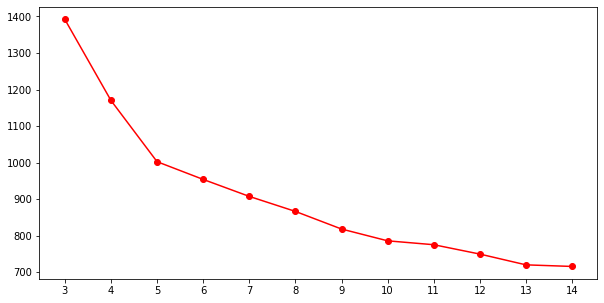

In [4]:
#Generate Elbow Curve

k = list(range(3,15))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [5]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=5).fit(df_norm)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 
Kmean_model.labels_

array([4, 4, 4, ..., 3, 1, 1])

In [6]:
EastWestAirlines['cluster']=model_labels # creating a  new column and assigning it to new column 
EastWestAirlines = EastWestAirlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

EastWestAirlines.iloc[:,1:11].groupby(EastWestAirlines.cluster).mean()
EastWestAirlines.sort_values(by=['cluster'], inplace=True)

EastWestAirlines.head()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3337,0,3360,32099,0,3,1,1,10534,6,0,0,1929,0
459,0,465,52980,0,3,1,1,17078,14,0,0,8237,0
1157,0,1169,100443,0,3,1,1,12744,21,0,0,5492,0
1158,0,1170,139664,0,5,1,1,63706,14,0,0,5505,0
2701,0,2723,54810,0,3,1,1,19665,21,0,0,2368,0


In [7]:
EastWestAirlines.to_csv("EastWestAirlines_k.csv")